In [11]:
# Importação das bibliotecas necessárias para o projeto.
# pandas: Usado para manipulação e análise de dados tabulares (DataFrames).
# numpy: Fundamental para operações numéricas, especialmente com arrays.
# pickle: Utilizado para serializar e desserializar objetos Python, neste caso, para carregar os datasets pré-processados.
# sklearn.neural_network.MLPClassifier: A classe principal para construir a Rede Neural Perceptron Multicamadas.
# sklearn.metrics.accuracy_score: Para calcular a acurácia do modelo.
# sklearn.metrics.classification_report: Gera um relatório detalhado com métricas como precisão, recall e F1-score.
# yellowbrick.classifier.ConfusionMatrix: Biblioteca para visualizar a matriz de confusão.
import pandas as pd
import numpy as np
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

In [12]:
# Carregamento do dataset de crédito pré-processado.
# O arquivo 'credit.pkl' contém os dados já divididos em conjuntos de treinamento e teste.
# As variáveis são:
# - X_credit_treinamento: Features de treinamento para o modelo de crédito.
# - y_credit_treinamento: Variável alvo de treinamento para o modelo de crédito.
# - X_credit_teste: Features de teste para o modelo de crédito.
# - y_credit_teste: Variável alvo de teste para o modelo de crédito.
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [13]:
# Verificação das dimensões (shape) dos conjuntos de treinamento do dataset de crédito.
# Isso confirma o número de amostras (linhas) e features (colunas) para X, e o número de amostras para y.
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [14]:
# Verificação das dimensões (shape) dos conjuntos de teste do dataset de crédito.
# Essencial para garantir que os dados estejam consistentes para a avaliação do modelo.
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [15]:
# Inicialização e treinamento do modelo MLPClassifier para o dataset de crédito.
# max_iter: Número máximo de iterações (épocas) para o otimizador.
# verbose: Define se o progresso do treinamento será impresso.
# tol: Tolerância para a otimização (critério de parada).
# solver: Algoritmo de otimização dos pesos ('adam' é um otimizador popular).
# activation: Função de ativação das camadas ocultas ('relu' é comum para MLPs).
# hidden_layer_sizes: Tupla definindo a arquitetura das camadas ocultas (neste caso, duas camadas com 2 neurônios cada).
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100, solver='adam', activation='relu', hidden_layer_sizes=(2,2))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.96908930
Iteration 2, loss = 0.96074280
Iteration 3, loss = 0.95224902
Iteration 4, loss = 0.94347571
Iteration 5, loss = 0.93448383
Iteration 6, loss = 0.92523313
Iteration 7, loss = 0.91566475
Iteration 8, loss = 0.90609785
Iteration 9, loss = 0.89599901
Iteration 10, loss = 0.88571010
Iteration 11, loss = 0.87521027
Iteration 12, loss = 0.86447794
Iteration 13, loss = 0.85347086
Iteration 14, loss = 0.84228573
Iteration 15, loss = 0.83093373
Iteration 16, loss = 0.81935666
Iteration 17, loss = 0.80747825
Iteration 18, loss = 0.79568533
Iteration 19, loss = 0.78357683
Iteration 20, loss = 0.77141269
Iteration 21, loss = 0.75917674
Iteration 22, loss = 0.74678119
Iteration 23, loss = 0.73452129
Iteration 24, loss = 0.72220683
Iteration 25, loss = 0.70976075
Iteration 26, loss = 0.69736287
Iteration 27, loss = 0.68505758
Iteration 28, loss = 0.67295984
Iteration 29, loss = 0.66045951
Iteration 30, loss = 0.64845810
Iteration 31, loss = 0.63632138
Iteration 32, los

c:\Users\coelh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05, verbose=True)

In [16]:
# Realização de previsões no conjunto de teste do dataset de crédito.
# 'previsores_credit' conterá as classes previstas pelo modelo para os dados de teste.
previsores = rede_neural_credit.predict(X_credit_teste)
previsores

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
# Exibição dos valores reais da variável alvo do conjunto de teste de crédito.
# Útil para comparar visualmente com as previsões (previsores_credit).
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
# Cálculo e exibição da acurácia do modelo para o dataset de crédito.
# A acurácia mede a proporção de previsões corretas sobre o total de previsões.
accuracy_score(y_credit_teste, previsores)

0.998

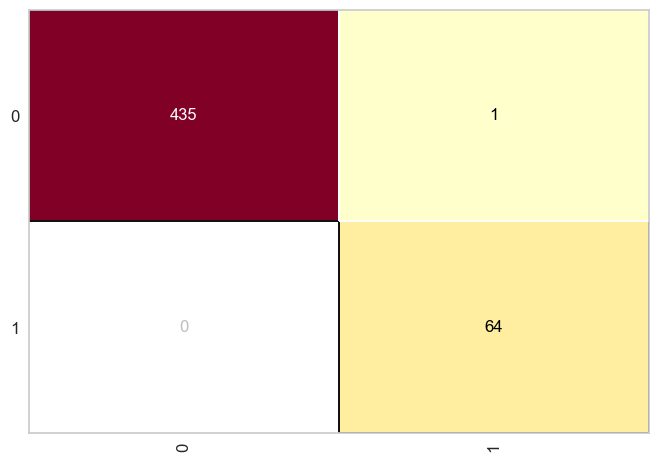

In [19]:
# Geração e exibição da Matriz de Confusão para o modelo de crédito.
# A matriz de confusão visualiza o desempenho do algoritmo de classificação.
# Os eixos mostram True Positives, True Negatives, False Positives e False Negatives.
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
# Salvar a matrix como imagem
plt.savefig('confusion_matrix_credit.png')

In [20]:
# Exibição do relatório de classificação detalhado para o modelo de crédito.
# Inclui precisão, recall, F1-score e suporte para cada classe.
print(classification_report(y_credit_teste,previsores))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [21]:
# Carregamento do dataset de censo pré-processado.
# Reutiliza os nomes das variáveis, o que pode levar a confusões se os datasets tiverem diferentes tamanhos iniciais ou processamento.
with open('census.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [22]:
# Inicialização e treinamento do modelo MLPClassifier para o dataset de censo.
# Nota: hidden_layer_sizes foi ajustado para (55,55) neste modelo, indicando uma arquitetura diferente.
rede_neural_census = MLPClassifier(max_iter=1000, verbose=True, tol=0.000010, hidden_layer_sizes=(55,55))
rede_neural_census.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.37768542
Iteration 2, loss = 0.32646774
Iteration 3, loss = 0.31541627
Iteration 4, loss = 0.30849257
Iteration 5, loss = 0.30371067
Iteration 6, loss = 0.29923797
Iteration 7, loss = 0.29575254
Iteration 8, loss = 0.29300759
Iteration 9, loss = 0.29005966
Iteration 10, loss = 0.28769419
Iteration 11, loss = 0.28563341
Iteration 12, loss = 0.28388066
Iteration 13, loss = 0.28224802
Iteration 14, loss = 0.28014853
Iteration 15, loss = 0.27927234
Iteration 16, loss = 0.27746831
Iteration 17, loss = 0.27531305
Iteration 18, loss = 0.27384068
Iteration 19, loss = 0.27218503
Iteration 20, loss = 0.27067165
Iteration 21, loss = 0.26887435
Iteration 22, loss = 0.26742779
Iteration 23, loss = 0.26579659
Iteration 24, loss = 0.26431239
Iteration 25, loss = 0.26344971
Iteration 26, loss = 0.26217186
Iteration 27, loss = 0.26019743
Iteration 28, loss = 0.25877702
Iteration 29, loss = 0.25787171
Iteration 30, loss = 0.25607276
Iteration 31, loss = 0.25645480
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [23]:
# Realização de previsões no conjunto de teste do dataset de censo.
previsores = rede_neural_census.predict(X_credit_teste)
previsores

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      shape=(4885,), dtype='<U6')

In [24]:
# Exibição dos valores reais da variável alvo do conjunto de teste de censo.
y_credit_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      shape=(4885,), dtype=object)

In [25]:
# Cálculo e exibição da acurácia do modelo para o dataset de censo.
accuracy_score(y_credit_teste,previsores)

0.8190378710337769

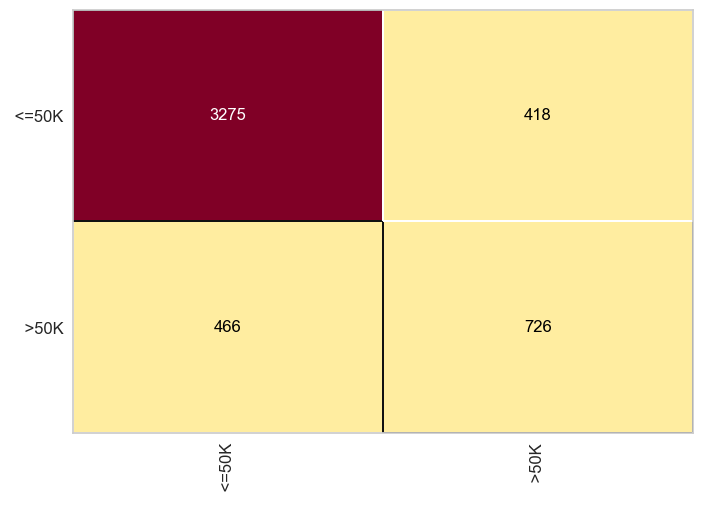

In [26]:
# Geração e exibição da Matriz de Confusão para o modelo de censo.
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
# Salvar a matrix como imagem
plt.savefig('confusion_matrix_census.png')

In [27]:
# Exibição do relatório de classificação detalhado para o modelo de censo.
print(classification_report(y_credit_teste,previsores))

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      3693
        >50K       0.63      0.61      0.62      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885

